## Dataset exploration

#### This is a notebook to discover the data. 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas 
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
from os.path import exists
from urllib.request import urlretrieve

import warnings
warnings.filterwarnings('ignore')

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))
hvplot_defaults = {'tiles':None, 'cmap':'Viridis', 'colorbar':True}

mpd.show_versions()


MovingPandas 0.17.2

SYSTEM INFO
-----------
python     : 3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
executable : /slurm/home/yrd/luolab/zhaoliang/.conda/envs/py310/bin/python
machine    : Linux-3.10.0-1160.el7.x86_64-x86_64-with-glibc2.17

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : None
GDAL data dir: None
PROJ       : 9.3.1
PROJ data dir: /slurm/home/yrd/luolab/zhaoliang/.conda/envs/py310/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.3
pandas     : 1.5.3
fiona      : None
numpy      : 1.26.3
shapely    : 2.0.1
rtree      : 1.2.0
pyproj     : 3.6.1
matplotlib : 3.4.3
mapclassify: None
geopy      : 2.4.1
holoviews  : 1.18.3
hvplot     : 0.9.2
geoviews   : None
stonesoup  : None


In [2]:
df = pd.read_csv('filtered_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,LLI NO,Date/Time,Lat,Lng,Distance (nm),Heading,Speed over ground,Course over ground,Draught (m),Navigation status,Nearest Place,Destination
0,1900,10010422,2021-01-18 18:12:00,-7.846667,121.805556,52.2,272,19.1,273.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
1,1901,10010422,2021-01-18 18:46:00,-7.835556,121.629167,58.4,273,18.6,273.5,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
2,1902,10010422,2021-01-18 19:15:00,-7.826111,121.471667,62.4,289,19.3,287.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
3,1903,10010422,2021-01-18 19:48:00,-7.749444,121.314722,69.0,295,19.1,296.9,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
4,1904,10010422,2021-01-18 19:53:00,-7.735833,121.287778,70.2,295,19.2,296.7,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
5,1905,10010422,2021-01-18 20:14:00,-7.684722,121.186944,75.1,296,19.2,297.0,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
6,1906,10010422,2021-01-18 20:15:00,-7.681944,121.181667,75.4,296,19.2,297.4,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
7,1907,10010422,2021-01-18 20:15:00,-7.682222,121.182222,75.4,296,19.2,297.4,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
8,1908,10010422,2021-01-18 20:21:00,-7.666667,121.151944,76.9,296,19.3,297.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021
9,1909,10010422,2021-01-18 20:56:00,-7.578333,120.982778,85.9,298,19.4,298.0,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021


In [4]:
df['Speed over ground'] = pd.to_numeric(df['Speed over ground'], errors = 'coerce')
df['Lat'] = pd.to_numeric(df['Lat'], errors = 'coerce')
df['Lng'] = pd.to_numeric(df['Lng'], errors = 'coerce')
df['Course over ground'] = pd.to_numeric(df['Course over ground'], errors = 'coerce')

In [5]:
df = df.dropna(how='all')
print(df.shape[0])

55694233


In [6]:
df = df.dropna(axis=0,subset = ["Speed over ground"])
df = df.dropna(axis=0,subset = ["Course over ground"])
print(df.shape[0])

55479464


<Axes: xlabel='Navigation status'>

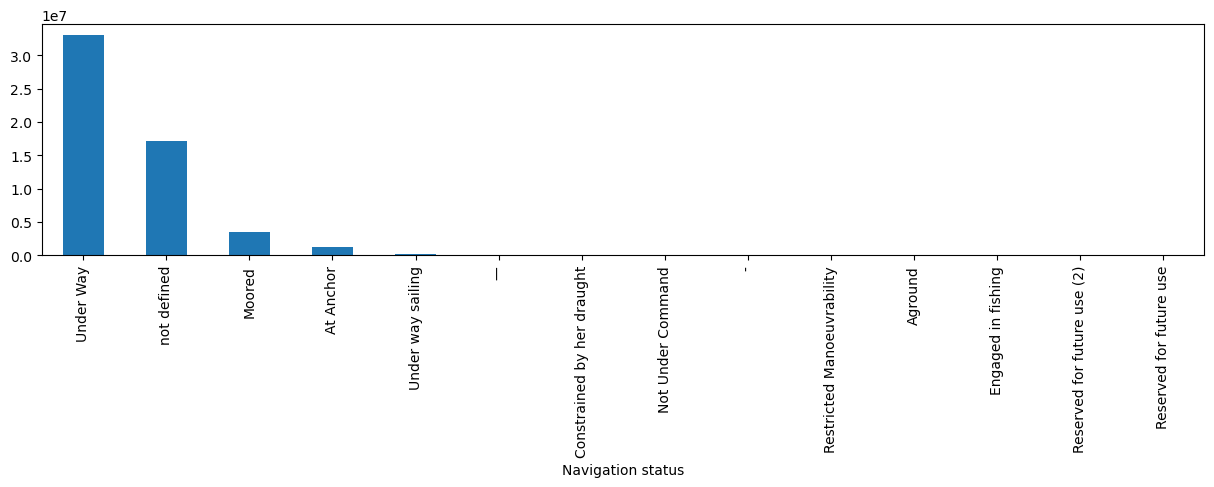

In [7]:
df['Navigation status'].value_counts().plot(kind='bar', figsize=(15,3))

In [8]:
df = df[df['Navigation status']=='Under Way']
print(df.shape[0])

32981276


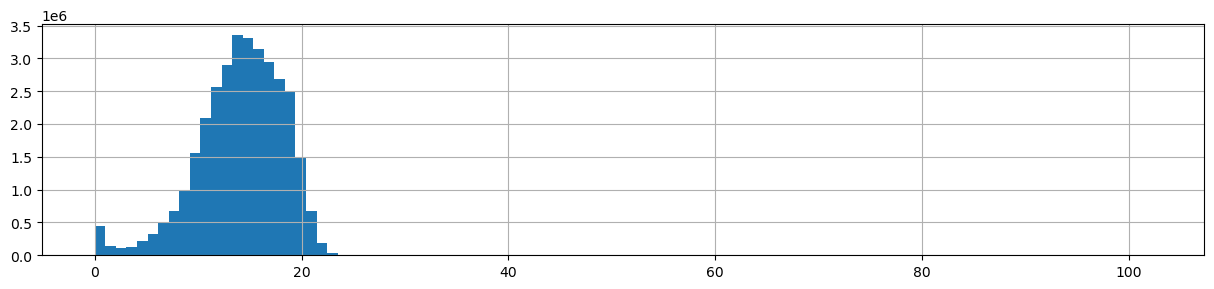

In [9]:
df['Speed over ground'].hist(bins=100, figsize=(15,3))
df = df[df['Speed over ground']>2]

<Axes: >

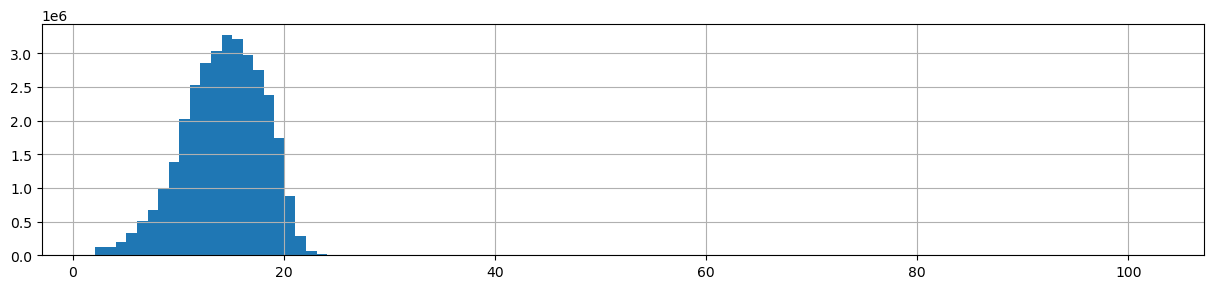

In [10]:
df['Speed over ground'].hist(bins=100, figsize=(15,3))

In [12]:
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lng, df.Lat))
df.head(10)

,Unnamed: 0,LLI NO,Date/Time,Lat,Lng,Distance (nm),Heading,Speed over ground,Course over ground,Draught (m),Navigation status,Nearest Place,Destination,geometry
0,1900,10010422,2021-01-18 18:12:00,-7.846667,121.805556,52.2,272,19.1,273.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.80556 -7.84667)
1,1901,10010422,2021-01-18 18:46:00,-7.835556,121.629167,58.4,273,18.6,273.5,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.62917 -7.83556)
2,1902,10010422,2021-01-18 19:15:00,-7.826111,121.471667,62.4,289,19.3,287.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.47167 -7.82611)
3,1903,10010422,2021-01-18 19:48:00,-7.749444,121.314722,69.0,295,19.1,296.9,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.31472 -7.74944)
4,1904,10010422,2021-01-18 19:53:00,-7.735833,121.287778,70.2,295,19.2,296.7,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.28778 -7.73583)
5,1905,10010422,2021-01-18 20:14:00,-7.684722,121.186944,75.1,296,19.2,297.0,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.18694 -7.68472)
6,1906,10010422,2021-01-18 20:15:00,-7.681944,121.181667,75.4,296,19.2,297.4,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.18167 -7.68194)
7,1907,10010422,2021-01-18 20:15:00,-7.682222,121.182222,75.4,296,19.2,297.4,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.18222 -7.68222)
8,1908,10010422,2021-01-18 20:21:00,-7.666667,121.151944,76.9,296,19.3,297.2,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (121.15194 -7.66667)
9,1909,10010422,2021-01-18 20:56:00,-7.578333,120.982778,85.9,298,19.4,298.0,12.1,Under Way,NaN,MYTPPETA: 21 Jan 2021,POINT (120.98278 -7.57833)


In [16]:
df['t'] = pd.to_datetime(df['Date/Time'], format='mixed')
df = df.drop('Nearest Place', axis = 1)
df.head()
# df = df.set_index(["t"])
# df = df.sort_index()

,Unnamed: 0,LLI NO,Date/Time,Lat,Lng,Distance (nm),Heading,Speed over ground,Course over ground,Draught (m),Navigation status,Destination,geometry,t
0,1900,10010422,2021-01-18 18:12:00,-7.846667,121.805556,52.2,272,19.1,273.2,12.1,Under Way,MYTPPETA: 21 Jan 2021,POINT (121.80556 -7.84667),2021-01-18 18:12:00
1,1901,10010422,2021-01-18 18:46:00,-7.835556,121.629167,58.4,273,18.6,273.5,12.1,Under Way,MYTPPETA: 21 Jan 2021,POINT (121.62917 -7.83556),2021-01-18 18:46:00
2,1902,10010422,2021-01-18 19:15:00,-7.826111,121.471667,62.4,289,19.3,287.2,12.1,Under Way,MYTPPETA: 21 Jan 2021,POINT (121.47167 -7.82611),2021-01-18 19:15:00
3,1903,10010422,2021-01-18 19:48:00,-7.749444,121.314722,69.0,295,19.1,296.9,12.1,Under Way,MYTPPETA: 21 Jan 2021,POINT (121.31472 -7.74944),2021-01-18 19:48:00
4,1904,10010422,2021-01-18 19:53:00,-7.735833,121.287778,70.2,295,19.2,296.7,12.1,Under Way,MYTPPETA: 21 Jan 2021,POINT (121.28778 -7.73583),2021-01-18 19:53:00


In [ ]:
df.to_csv('cleaned_data.csv')

In [ ]:
# keep data from 2021/01/01 to 2021/3/30, spring
# filtered_df = df.truncate(after = '2021-03-30')
# filtered_df.head(10)
# print(filtered_df.shape[0])

In [ ]:
# filtered_df = filtered_df.sort_values(by='LLI NO', ascending=True)
# filtered_df = filtered_df.set_index(["Unnamed: 0"])
# filtered_df['t'] = pd.to_datetime(filtered_df['Date/Time'], format='mixed')
# vessel_id = filtered_df['LLI NO'].unique()

# # sort according to vessel id and time
# # data = pd.DataFrame([])
# for i in range(vessel_id.shape[0]):
#     filtered_df[filtered_df['LLI NO'] == vessel_id[i]] = filtered_df[filtered_df['LLI NO'] == vessel_id[i]].sort_values(by = 't')

    
# filtered_df.head(10)

In [ ]:
# filtered_df